In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('HousePrices_HalfMil.csv',sep=';')
data.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


In [4]:
data.shape

(1000, 7)

In [5]:
data.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


In [6]:
sns.set_palette("Accent")

sns.set_style("darkgrid")

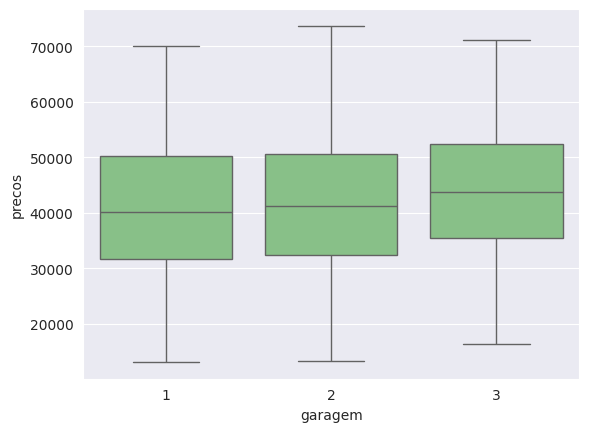

In [7]:
sns.boxplot(data=data, x='garagem', y='precos');

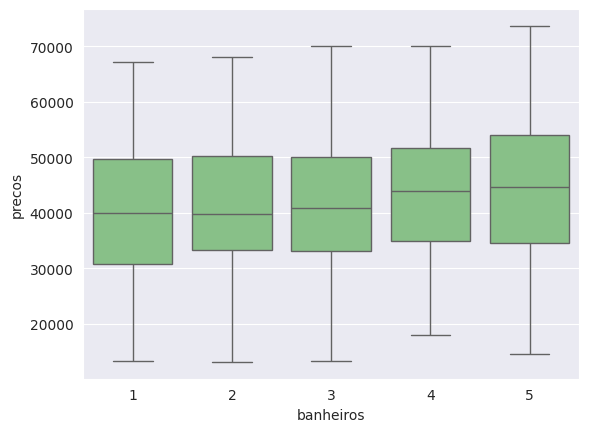

In [8]:
sns.boxplot(data=data, x='banheiros', y='precos');

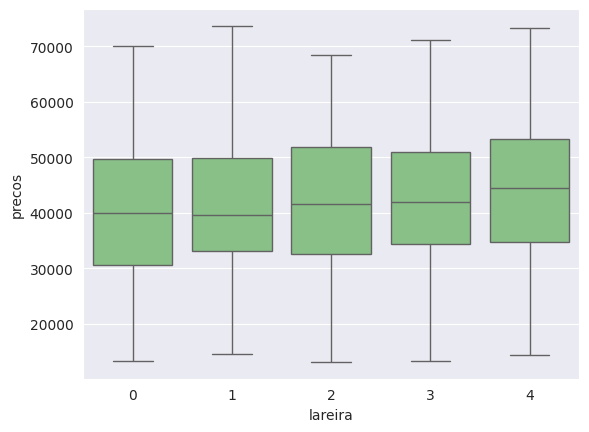

In [9]:
sns.boxplot(data=data, x='lareira', y='precos');

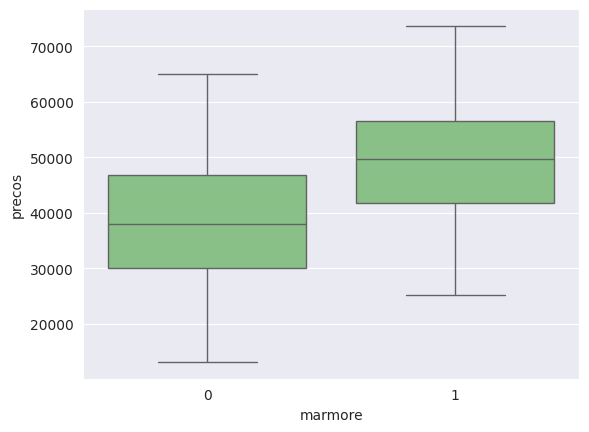

In [10]:
sns.boxplot(data=data, x='marmore', y='precos');

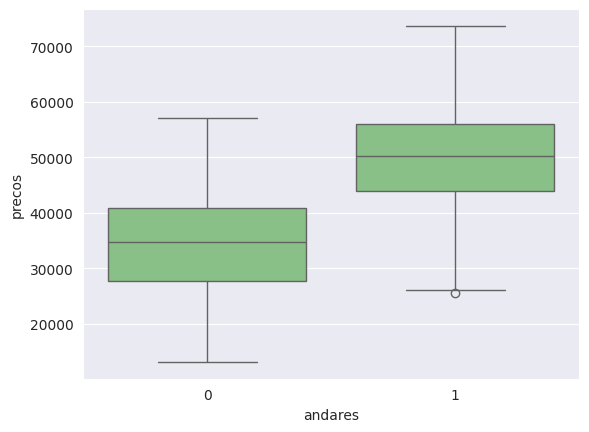

In [11]:
sns.boxplot(data=data, x='andares', y='precos');

# **Modelo Machine Learning**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
y = data['precos']
X = data[['area','garagem','banheiros','lareira','marmore','andares']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=999)
modelo = LinearRegression()
modelo.fit(X_train.values, y_train.values)
modelo.score(X_test.values, y_test.values)

0.6556832546565017

In [48]:
data.dtypes

precos       int64
area         int64
garagem      int64
banheiros    int64
lareira      int64
marmore      int64
andares      int64
dtype: object

**Simulador Simples**

In [55]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 47078.41


Criando um pickle para utilizar o modelo em outro notebook.

In [56]:
import pickle

In [58]:
output = open('calculaimoveis9', 'wb')
pickle.dump(modelo, output)
output.close()